# K近邻分类实验

在这个练习中，我们使用电信企业的客户流失数据集，`e2.1_Orange_Telecom_Churn_Data.csv`（存放在当前目录下）。我们先读入数据集，做一些数据预处理，然后使用K近邻模型根据用户的特点来预测其是否会流失。

### 第一步：
* 将数据集读入变量`data`中，并查看其前5行。
* 去除其中的`"state"`，`"area_code"`和`"phone_number"`三列。

In [88]:
# 将数据集读入变量data中，并查看其前5行
import pandas as pd
data = pd.read_csv('e2.1_Orange_Telecom_Churn_Data.csv')
data.head()

state  account_length  ...  number_customer_service_calls churned
0    KS             128  ...                              1   False
1    OH             107  ...                              1   False
2    NJ             137  ...                              0   False
3    OH              84  ...                              2   False
4    OK              75  ...                              3   False

[5 rows x 21 columns]

In [89]:
# 去除“state"，"area_code"和"phone_number"三列
data.drop('state', axis=1, inplace=True)
data.drop('area_code', axis=1, inplace=True)
data.drop('phone_number', axis=1, inplace=True)

### 第二步：
* 有些列的值是分类数据，如`'intl_plan'`, `'voice_mail_plan'`, `'churned'`这三列，需要把它们转换成数值数据。

In [90]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])
data.head(5)

account_length  intl_plan  ...  number_customer_service_calls  churned
0             128          0  ...                              1        0
1             107          0  ...                              1        0
2             137          0  ...                              0        0
3              84          1  ...                              2        0
4              75          1  ...                              3        0

[5 rows x 18 columns]

### 第三步：
* 将除“churned”列之外的所有其他列的数据与“churned”列的数据分开，即创建两张数据表，`X_data`和`y_data`。
* 使用课件中提到的某种尺度转换方法（scaling method）来缩放`X_data`。

In [91]:
# 生成X_data和y_data
X_data = data.drop('churned', axis=1).values
y_data = data['churned'].values

In [92]:
# 缩放X_data
from sklearn.preprocessing import StandardScaler
stdSc=StandardScaler()
X_data=stdSc.fit_transform(X_data)



### 第四步：
* 创建一个k=3的K近邻模型，并拟合`X_data`和`y_data`。

In [93]:
# 创建一个3NN模型，并训练
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_data, y_data)


KNeighborsClassifier(n_neighbors=3)

### 第五步：
* 用上一步训练好的K近邻模型预测相同的数据集，即`X_data`，并评测预测结果的精度。

In [94]:
# 预测并评价
from sklearn.metrics import classification_report
y_pred = knn.predict(X_data)
print(classification_report(y_data, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4293
           1       0.93      0.62      0.74       707

    accuracy                           0.94      5000
   macro avg       0.94      0.80      0.85      5000
weighted avg       0.94      0.94      0.93      5000



### 第六步：
* 构建一个同样是`n_neighbors=3`的模型，但是用距离作为聚集K个近邻预测结果的权重。同样计算此模型在X_data上的预测精度。 
* 构建另一个K近邻模型：使用均匀分布的权重，但是将闵科夫斯基距离中的指数参数设为1(`p=1`)，即使用曼哈顿距离。

In [95]:
# n_neighbors=3, weights='distance'
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(classification_report(y_data, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4293
           1       1.00      1.00      1.00       707

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [96]:
# n_neighbors=3, p=1
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(classification_report(y_data, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4293
           1       0.94      0.63      0.75       707

    accuracy                           0.94      5000
   macro avg       0.94      0.81      0.86      5000
weighted avg       0.94      0.94      0.94      5000



### 第七步：
* 将K值从1变化到20，训练20个不同的K近邻模型。权重使用均匀分布的权重（缺省的）。闵科夫斯基距离的指数参数(`p`)可以设为1或者2（只要一致即可）。将每个模型得到的精度和其`k`值存到一个列表或字典中。
* 将`accuracy`和`k`的关系绘成图表。当`k=1`时，你观察到了什么? 为什么?

In [97]:
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    scores.append((k, knn.score(X_data, y_data)))
print(scores)


[(1, 1.0), (2, 0.9218), (3, 0.9396), (4, 0.912), (5, 0.928), (6, 0.9094), (7, 0.9194), (8, 0.9052), (9, 0.9144), (10, 0.9024), (11, 0.9112), (12, 0.9002), (13, 0.9086), (14, 0.8984), (15, 0.9032), (16, 0.8944), (17, 0.8998), (18, 0.8934), (19, 0.8996), (20, 0.8928)]


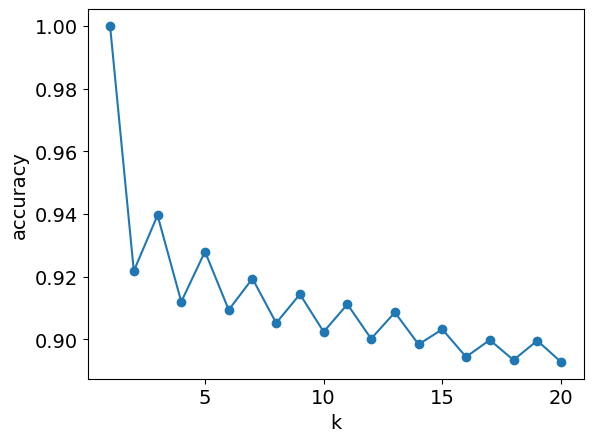

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot([k for k, v in scores], [v for k, v in scores], 'o-')